In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def prepareData(df):
    df = df.drop('Open', 1)
    df = df.drop('High', 1)
    df = df.drop('Low', 1)
    df = df.drop('Close', 1)

    df = df.astype({'Date': 'datetime64[ns]', 'Adj Close': 'float', 'Volume': 'float'}, copy=False)    
    
    return df

In [3]:
# The functions used to generate the price chart are adaptations of the code created by Uros Trifunovic
# Source: https://github.com/uros-trifunovic/Visualizing-historical-stock-prices-and-volume/blob/main/Visualizing%20Stock%20Price%20and%20Volume.ipynb

# Defines the colors used in graphics
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

def format_borders(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.spines['left'].set_color(colors['grey'])
    plot.spines['bottom'].set_color(colors['grey'])

def format_legend(plot):
    plot_legend = plot.legend(loc='upper left', bbox_to_anchor=(-0.005, 0.95), fontsize=16)
    for text in plot_legend.get_texts():
        text.set_color(colors['grey'])

def get_prev_day_info(plot, date, close, vol):
    previous_close='$' + str("{:,}".format(close.iloc[-1])) 
    previous_volume=str("{:,}".format(vol.iloc[-1]))
    previous_date=str(date.iloc[-1])

    plot.set_title(
        'Closing price on ' + previous_date + ': ' + previous_close + 
        '\nShares traded on ' + previous_date + ': ' + previous_volume, 
         fontdict=config_title, loc='left'
    )        

def get_charts(symbol, date, close, vol):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(symbol + ' Price and Volume', size=36, color=colors['grey'], x=0.24, y=1.10)
       
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], linewidth=2, label='Price')
    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    plot_price.set_axisbelow(True)
    
    format_borders(plot_price)
    format_legend(plot_price)
    get_prev_day_info(plot_price, date, close, vol)   
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plot_vol.yaxis.tick_right()
    plot_vol.tick_params(axis='both', **config_ticks)
    plot_vol.yaxis.set_label_position("right")
    plot_vol.set_xlabel('Date', fontsize=14)
    plot_vol.set_ylabel('Volume (in millions)', fontsize=14)
    plot_vol.yaxis.label.set_color(colors['grey'])
    plot_vol.xaxis.label.set_color(colors['grey'])
    
    format_borders(plot_vol)

In [4]:
# Importing daily price RVN-USD
# source: https://au.finance.yahoo.com/quote/RVN-USD/history?period1=1520640000&period2=1622419200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

dfPriceRVN = pd.read_csv('Datasets/RVN-USD.csv')
dfPriceRVN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-10,0.026499,0.028772,0.026063,0.028618,0.028618,171820.0
1,2018-03-11,0.028520,0.033503,0.026241,0.031883,0.031883,279104.0
2,2018-03-12,0.031496,0.034305,0.028595,0.030258,0.030258,218114.0
3,2018-03-13,0.029902,0.030913,0.025711,0.027902,0.027902,167669.0
4,2018-03-14,0.027723,0.028685,0.023747,0.024386,0.024386,131838.0
...,...,...,...,...,...,...,...
1174,2021-05-27,0.101504,0.103803,0.091664,0.094475,0.094475,66895929.0
1175,2021-05-28,0.094473,0.096013,0.077685,0.081287,0.081287,63652398.0
1176,2021-05-29,0.081168,0.084461,0.070398,0.076148,0.076148,46482352.0
1177,2021-05-30,0.076206,0.083790,0.070914,0.078637,0.078637,38637338.0


In [5]:
# Adjusting the dataset
dfPriceRVN = prepareData(dfPriceRVN)

In [6]:
dfPriceRVN

,Date,Adj Close,Volume
0,2018-03-10,0.028618,171820.0
1,2018-03-11,0.031883,279104.0
2,2018-03-12,0.030258,218114.0
3,2018-03-13,0.027902,167669.0
4,2018-03-14,0.024386,131838.0
...,...,...,...
1174,2021-05-27,0.094475,66895929.0
1175,2021-05-28,0.081287,63652398.0
1176,2021-05-29,0.076148,46482352.0
1177,2021-05-30,0.078637,38637338.0


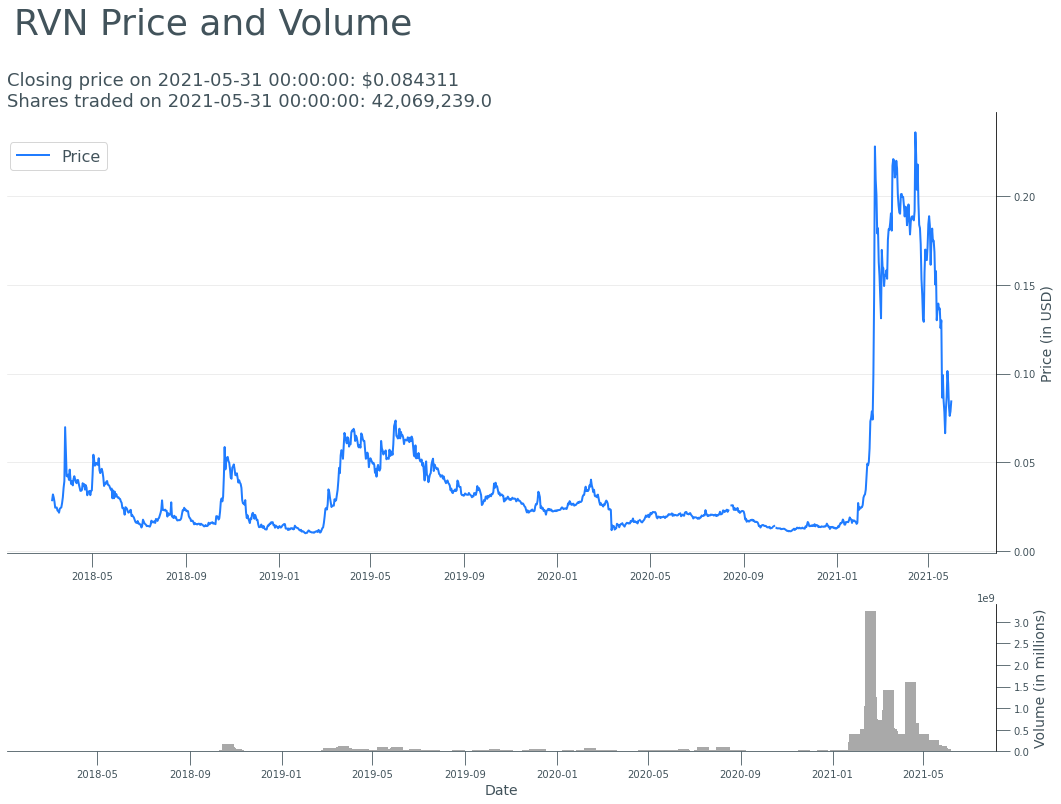

In [7]:
# Generate the price chart
%matplotlib inline

get_charts('RVN', dfPriceRVN['Date'], dfPriceRVN['Adj Close'], dfPriceRVN['Volume'])

In [8]:
# Importing daily price BTC-USD
# source: https://au.finance.yahoo.com/quote/RVN-USD/history?period1=1520640000&period2=1622419200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

dfPriceBTC = pd.read_csv('Datasets/BTC-USD.csv')
dfPriceBTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-10,9350.589844,9531.320313,8828.469727,8866.000000,8866.000000,5.386320e+09
1,2018-03-11,8852.780273,9711.889648,8607.120117,9578.629883,9578.629883,6.296370e+09
2,2018-03-12,9602.929688,9937.500000,8956.429688,9205.120117,9205.120117,6.457400e+09
3,2018-03-13,9173.040039,9470.379883,8958.190430,9194.849609,9194.849609,5.991140e+09
4,2018-03-14,9214.650391,9355.849609,8068.589844,8269.809570,8269.809570,6.438230e+09
...,...,...,...,...,...,...,...
1174,2021-05-27,39316.890625,40379.617188,37247.902344,38436.968750,38436.968750,4.321097e+10
1175,2021-05-28,38507.082031,38856.968750,34779.039063,35697.605469,35697.605469,5.520019e+10
1176,2021-05-29,35684.156250,37234.500000,33693.929688,34616.066406,34616.066406,4.523101e+10
1177,2021-05-30,34607.406250,36400.667969,33520.738281,35678.128906,35678.128906,3.164608e+10


In [9]:
# Adjusting the dataset
dfPriceBTC = prepareData(dfPriceBTC)

In [10]:
dfPriceBTC

,Date,Adj Close,Volume
0,2018-03-10,8866.000000,5.386320e+09
1,2018-03-11,9578.629883,6.296370e+09
2,2018-03-12,9205.120117,6.457400e+09
3,2018-03-13,9194.849609,5.991140e+09
4,2018-03-14,8269.809570,6.438230e+09
...,...,...,...
1174,2021-05-27,38436.968750,4.321097e+10
1175,2021-05-28,35697.605469,5.520019e+10
1176,2021-05-29,34616.066406,4.523101e+10
1177,2021-05-30,35678.128906,3.164608e+10


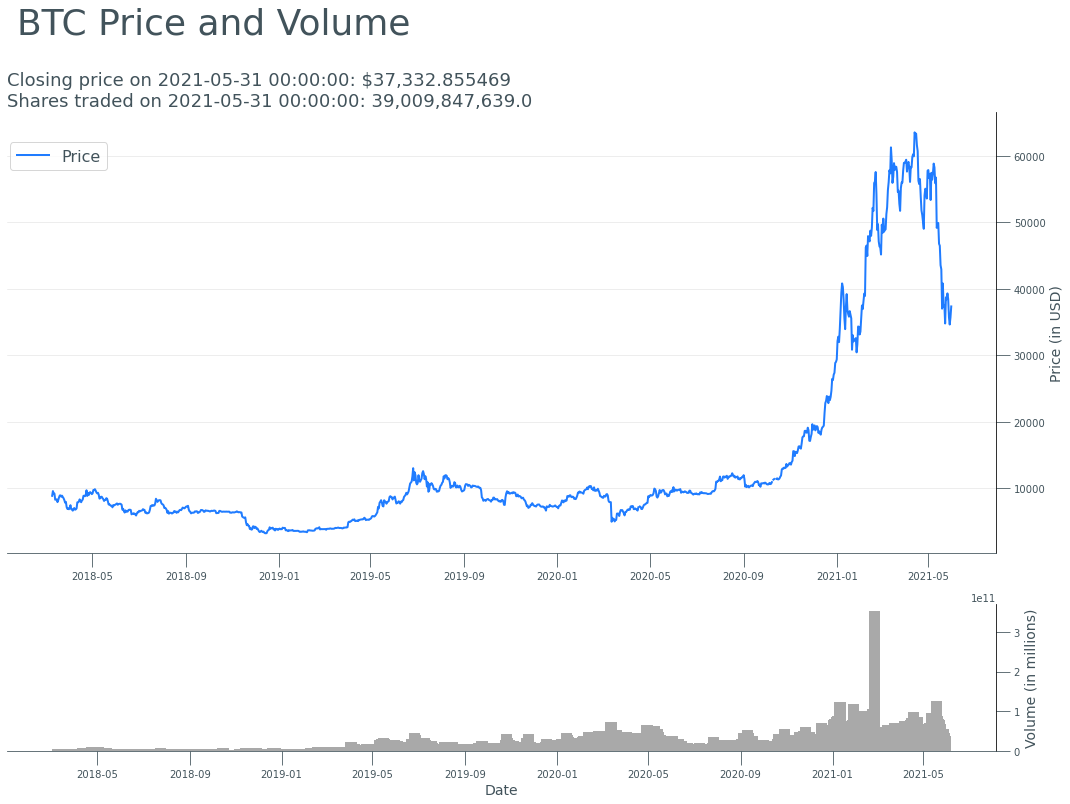

In [11]:
# Generate the price chart
%matplotlib inline

get_charts('BTC', dfPriceBTC['Date'], dfPriceBTC['Adj Close'], dfPriceBTC['Volume'])

In [12]:
# Normalization/standardization of column names
def prepareDataset(df, suffix):
    
    df.columns = [col.lower() for col in df.columns]
    
    df['adj close'] = np.log(df['adj close'])
    #df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
    
    df.columns = [col_name+'_'+suffix for col_name in df.columns]
    df.rename(columns = {'date_'+suffix:'date'}, inplace = True)    

    return df

In [13]:
# Preparing dataset

prepareDataset(dfPriceRVN, 'RVN')
dfPriceRVN

,date,adj close_RVN,volume_RVN
0,2018-03-10,-3.553719,171820.0
1,2018-03-11,-3.445682,279104.0
2,2018-03-12,-3.497995,218114.0
3,2018-03-13,-3.579057,167669.0
4,2018-03-14,-3.713746,131838.0
...,...,...,...
1174,2021-05-27,-2.359420,66895929.0
1175,2021-05-28,-2.509769,63652398.0
1176,2021-05-29,-2.575076,46482352.0
1177,2021-05-30,-2.542913,38637338.0


In [14]:
# Preparing dataset

prepareDataset(dfPriceBTC, 'BTC')
dfPriceBTC

,date,adj close_BTC,volume_BTC
0,2018-03-10,9.089979,5.386320e+09
1,2018-03-11,9.167290,6.296370e+09
2,2018-03-12,9.127515,6.457400e+09
3,2018-03-13,9.126399,5.991140e+09
4,2018-03-14,9.020367,6.438230e+09
...,...,...,...
1174,2021-05-27,10.556775,4.321097e+10
1175,2021-05-28,10.482839,5.520019e+10
1176,2021-05-29,10.452073,4.523101e+10
1177,2021-05-30,10.482293,3.164608e+10


In [15]:
# Merge of datasets
dfMerge = dfPriceRVN.merge(dfPriceBTC, left_on='date', right_on='date', how='left')
dfMerge

,date,adj close_RVN,volume_RVN,adj close_BTC,volume_BTC
0,2018-03-10,-3.553719,171820.0,9.089979,5.386320e+09
1,2018-03-11,-3.445682,279104.0,9.167290,6.296370e+09
2,2018-03-12,-3.497995,218114.0,9.127515,6.457400e+09
3,2018-03-13,-3.579057,167669.0,9.126399,5.991140e+09
4,2018-03-14,-3.713746,131838.0,9.020367,6.438230e+09
...,...,...,...,...,...
1174,2021-05-27,-2.359420,66895929.0,10.556775,4.321097e+10
1175,2021-05-28,-2.509769,63652398.0,10.482839,5.520019e+10
1176,2021-05-29,-2.575076,46482352.0,10.452073,4.523101e+10
1177,2021-05-30,-2.542913,38637338.0,10.482293,3.164608e+10


In [16]:
# Date column as index
datetime_series = pd.to_datetime(dfMerge['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)

dfMerge = dfMerge.set_index(datetime_index)

dfMerge.drop('date', axis=1, inplace=True)
dfMerge.sort_index(inplace=True)

dfMerge

,adj close_RVN,volume_RVN,adj close_BTC,volume_BTC
2018-03-10,-3.553719,171820.0,9.089979,5.386320e+09
2018-03-11,-3.445682,279104.0,9.167290,6.296370e+09
2018-03-12,-3.497995,218114.0,9.127515,6.457400e+09
2018-03-13,-3.579057,167669.0,9.126399,5.991140e+09
2018-03-14,-3.713746,131838.0,9.020367,6.438230e+09
...,...,...,...,...
2021-05-27,-2.359420,66895929.0,10.556775,4.321097e+10
2021-05-28,-2.509769,63652398.0,10.482839,5.520019e+10
2021-05-29,-2.575076,46482352.0,10.452073,4.523101e+10
2021-05-30,-2.542913,38637338.0,10.482293,3.164608e+10


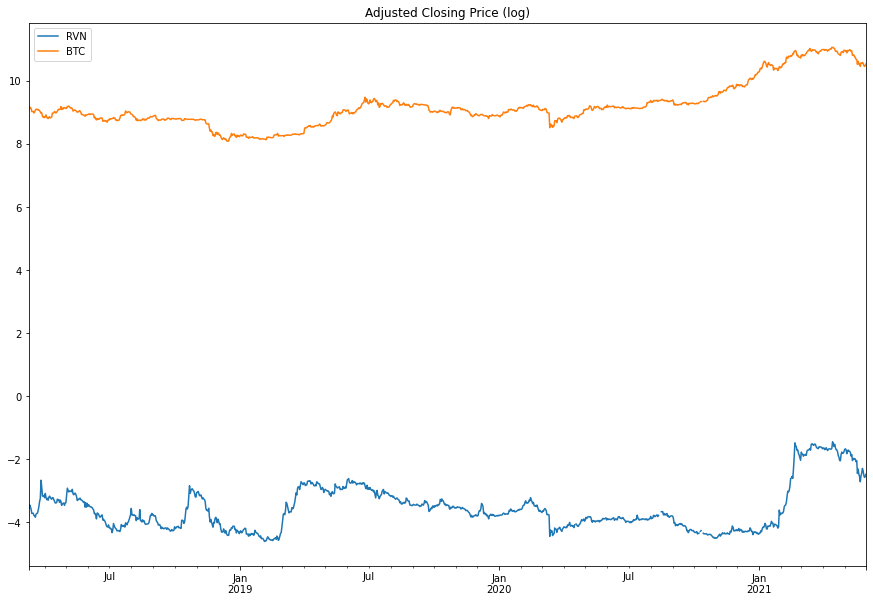

In [17]:
dfMerge['adj close_RVN'].plot(label='RVN', figsize=(15,10), title='Adjusted Closing Price (log)')
dfMerge['adj close_BTC'].plot(label='BTC')
plt.legend()

## Analyze:

In the period under analysis (10/03/2018 to 05/31/2021), the price of the BTC was in the order of thousands of dollars while the RVN was in cents.

In order to be able to present both cryptoactives in the same graph, it was necessary to apply a log to the prices.

From the graph we can see that there may be some correlation between the price of assets, we will test this hypothesis later.